In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
import pandas as pd

from cnn_model import build_model, train_model, save_cnn_model, load_cnn_model
from models.cnn_v2.cnn_normalize import get_cnn_data
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data, plot_direction_comparison
from constants import SP500_TICKER, NASDAQ_TICKER, DJI_TICKER
# import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             128       
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 64)             4160      
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 32)             2080      
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 32)                5152      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11553 (45.13 KB)
Trainable params: 11553 

---

## For **train_model** function

In [4]:
# nasdaq_train, nasdaq_test, nasdaq_predict= get_cnn_data(NASDAQ_TICKER)
train, test, predict= get_cnn_data(NASDAQ_TICKER)

x_train = train["x"] 
y_train = train["y"]

x_test = test["x"]
y_test = test["y"]

x_predict = predict["x"]
y_predict = predict["y"]


print("Train data:")
print(x_train[0])
print(x_train.shape)
print(y_train[0])
print(y_train.shape)

print("Test data:")
print(y_test[0])
print(x_test.shape)
print(x_test[0])
print(x_test.shape)

print("Predict data:")
print(x_predict[0])
print(x_predict.shape)
print(y_predict[0])
print(y_predict.shape)

Train data:
[1.69130953e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00]
(7649, 5)
0.0
(7649,)
Test data:
0.0
(956, 5)
[0.24706974 0.25553885 0.26050646 0.27060725 0.        ]
(956, 5)
Predict data:
[0.45590062 0.4485103  0.50314788 0.53848136 1.        ]
(957, 5)
1.0
(957,)


In [5]:
# plt = config_chart('Model Data')
# plt.plot(y_dates_train[:, 0], y_train[:, 0])
# plt.plot(y_dates_test[:, 0], y_test[:, 0])
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.legend(['Train', 'Test','Predict'])

Epoch 1/100


240/240 [==============================] - 2s 2ms/step - loss: 0.2663 - mean_absolute_error: 0.5014 - accuracy: 0.5099
Epoch 2/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2497 - mean_absolute_error: 0.4969 - accuracy: 0.5346
Epoch 3/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2509 - mean_absolute_error: 0.4976 - accuracy: 0.5129
Epoch 4/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2503 - mean_absolute_error: 0.4969 - accuracy: 0.5271
Epoch 5/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2498 - mean_absolute_error: 0.4966 - accuracy: 0.5232
Epoch 6/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2491 - mean_absolute_error: 0.4954 - accuracy: 0.5321
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2491 - mean_absolute_error: 0.4961 - accuracy: 0.5294
Epoch 8/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2494

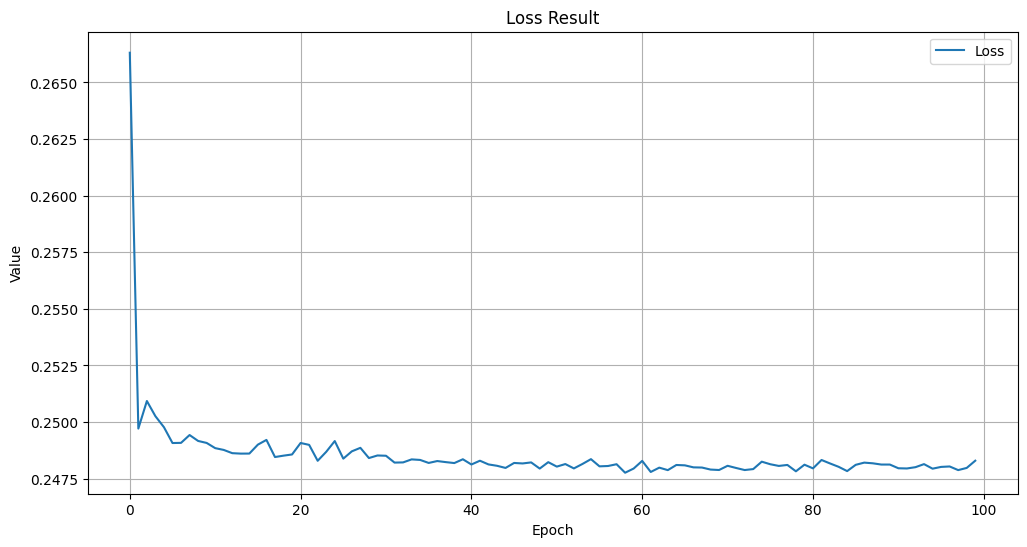

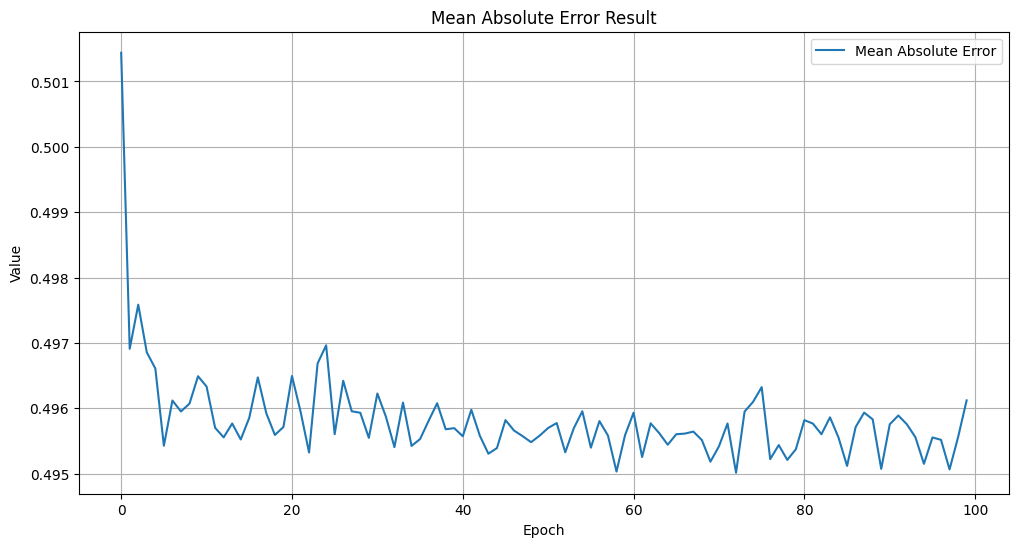

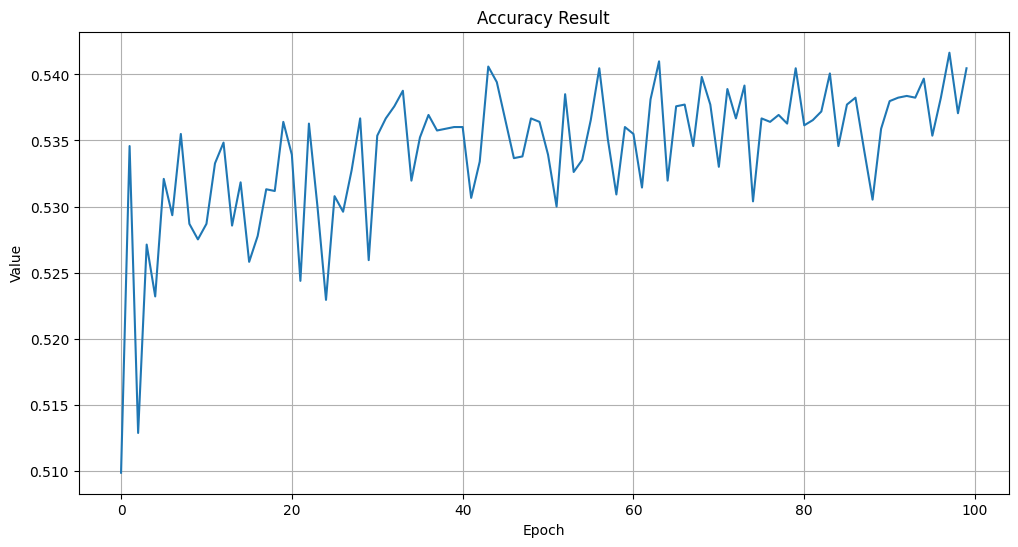

Train result:
Test result:
[0.24936936795711517, 0.4942755103111267, 0.5094142556190491]


In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test) 

plot_model_performance(fit_result)
# plot_model_performance(evaluate_result)

print("Train result:")
print(fit_result)

print("Test result:")
print(evaluate_result)

save_cnn_model(model)

In [7]:
latest_train_metrics = [value[-1] for key, value in fit_result.history.items()]

print("Train result:")
print("accuracy, loss, precision, recall")
print(latest_train_metrics)

print("Test result:")
print("loss, accuracy, precision, recall")
print(evaluate_result)

Train result:
accuracy, loss, precision, recall
[0.24829213321208954, 0.49612054228782654, 0.5404627919197083]
Test result:
loss, accuracy, precision, recall
[0.24936936795711517, 0.4942755103111267, 0.5094142556190491]


In [8]:
model = load_cnn_model()

240/240 [==============================] - 0s 1ms/step


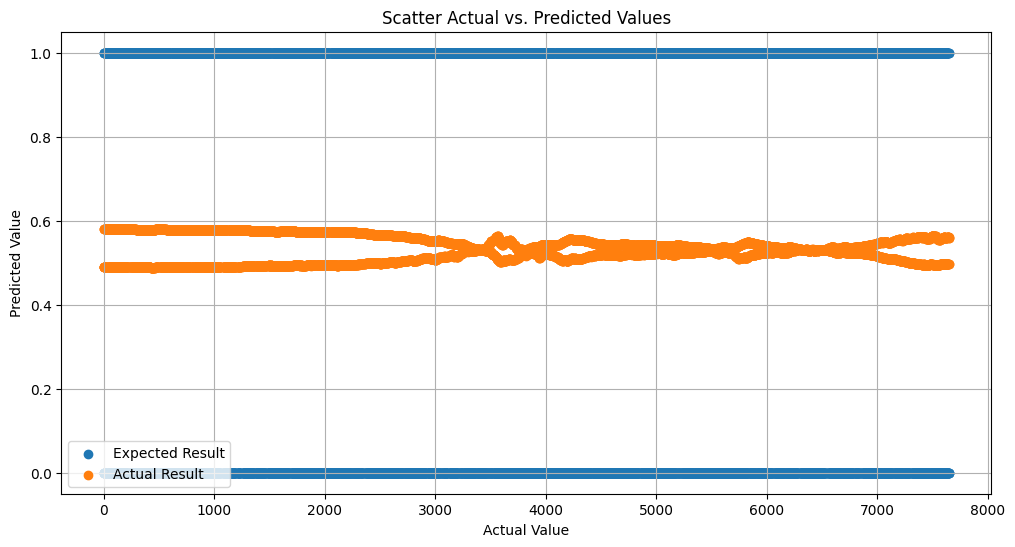

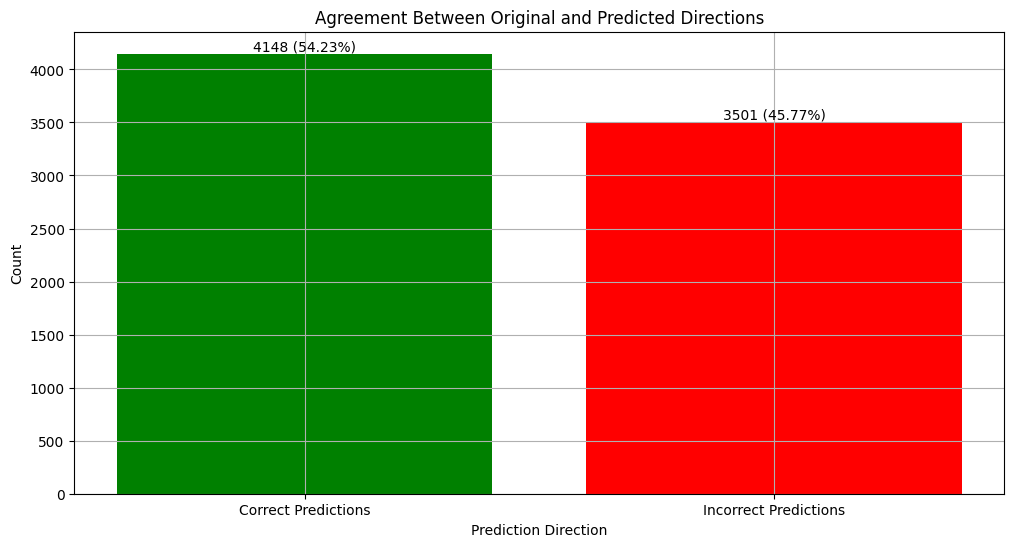

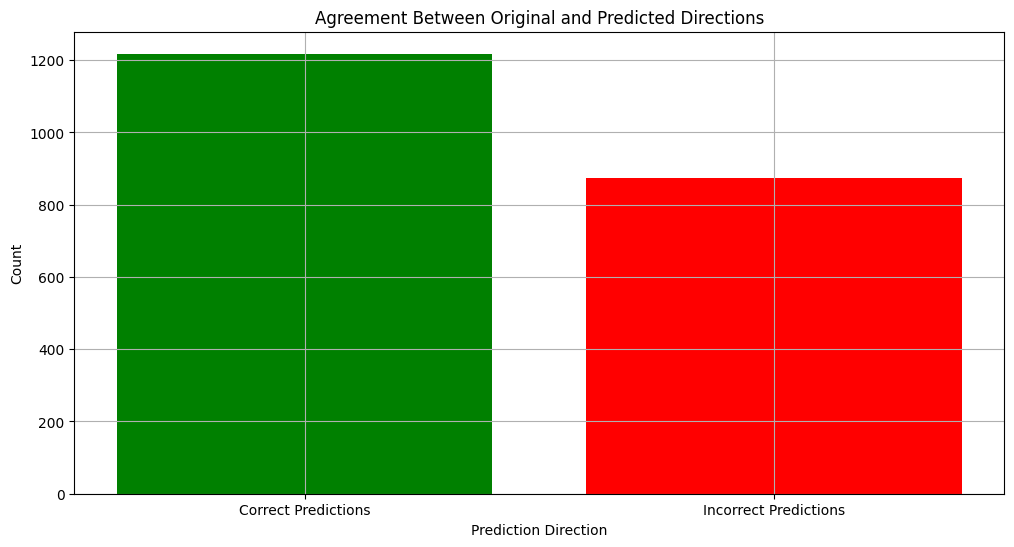

In [9]:
predictions_train = model.predict(x_train)

plot_scatter_data(y_train, predictions_train)
plot_direction_comparison(y_train, predictions_train)

30/30 [==============================] - 0s 1ms/step


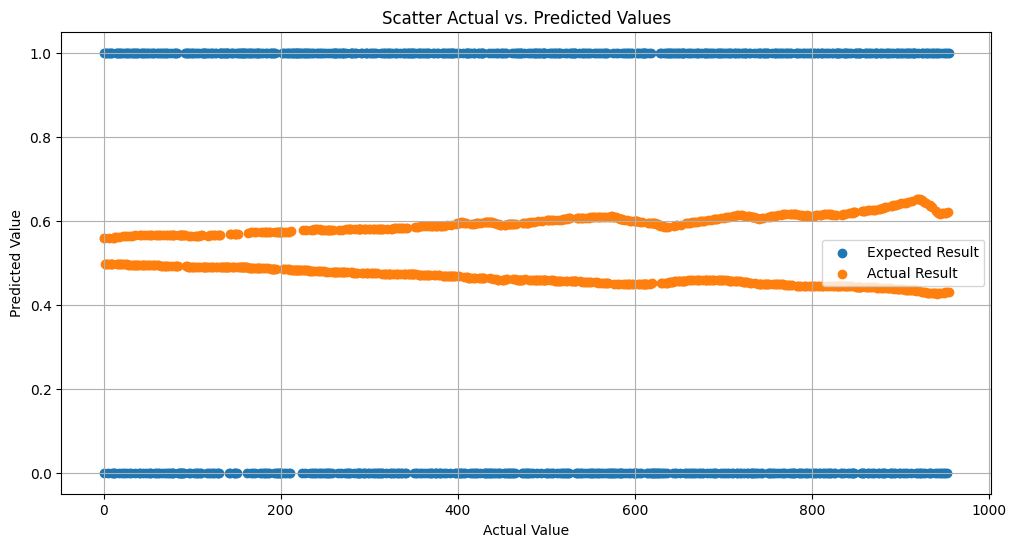

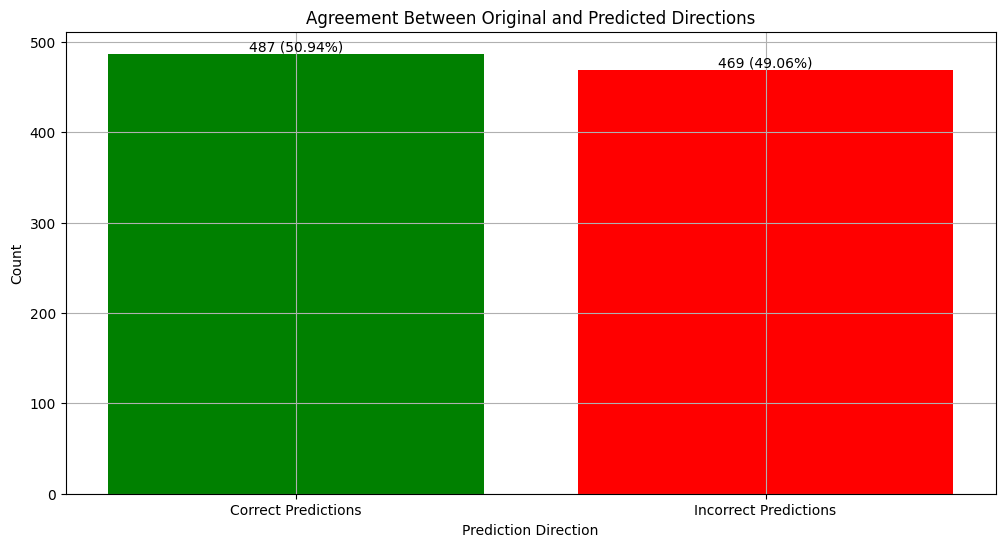

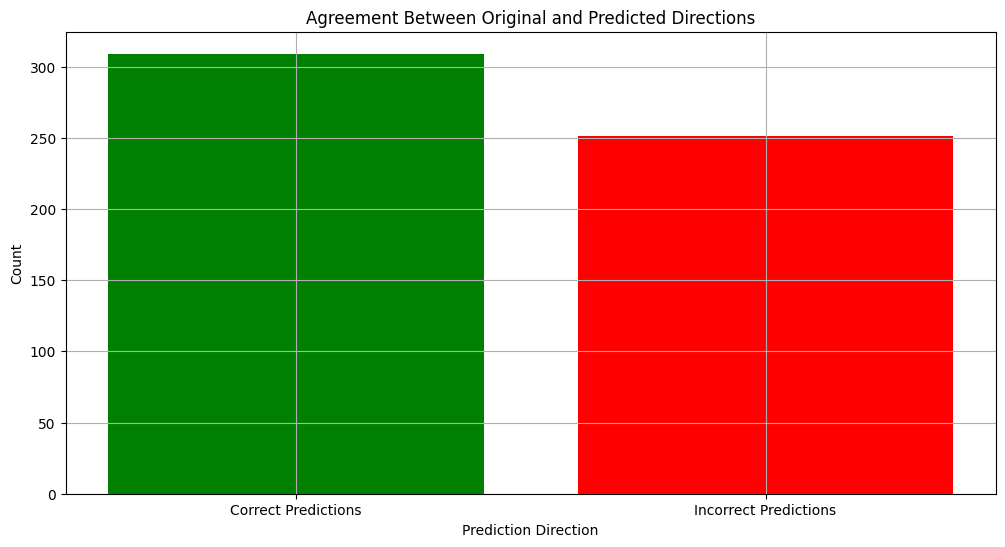

In [10]:
predictions_test = model.predict(x_test)

plot_scatter_data(y_test, predictions_test)
plot_direction_comparison(y_test, predictions_test)


30/30 [==============================] - 0s 1ms/step


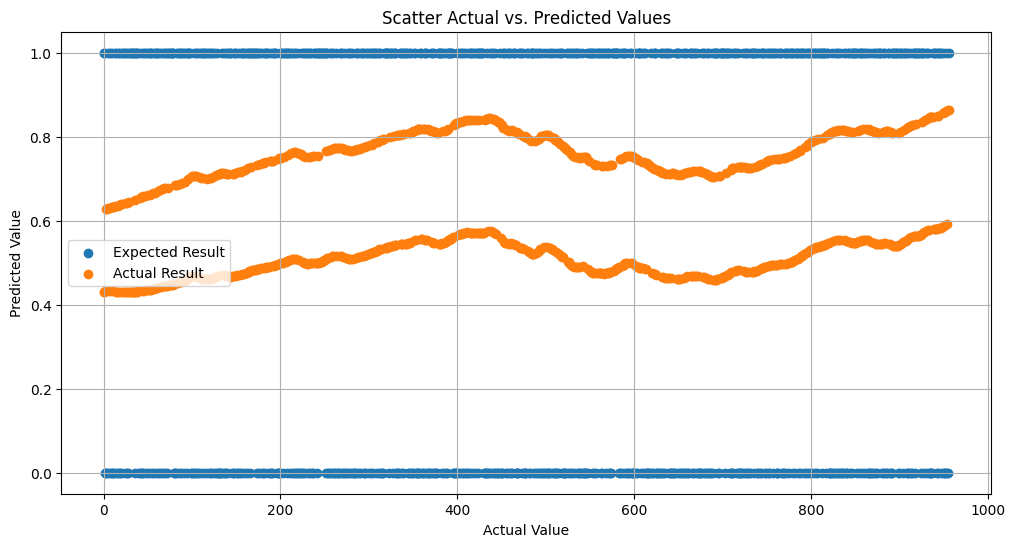

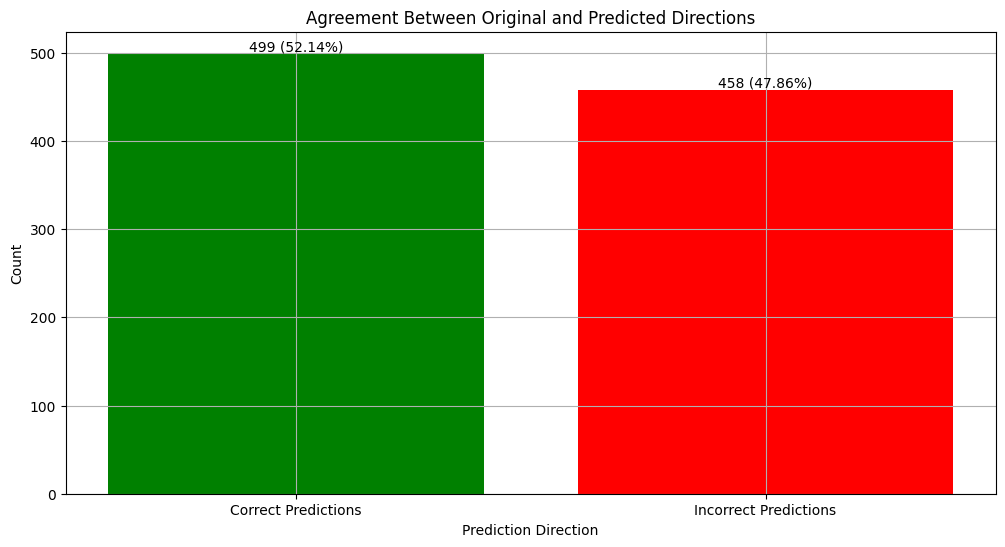

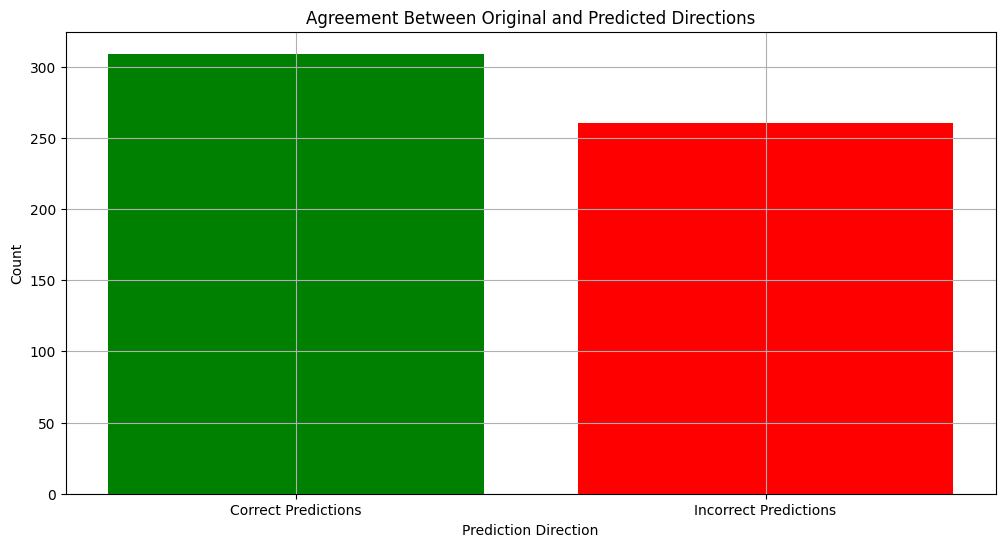

In [11]:
predictions = model.predict(x_predict)

predictions = predictions

plot_scatter_data(y_predict, predictions)
plot_direction_comparison(y_predict, predictions)